<a href="https://colab.research.google.com/github/Virum9520/Stock-Price-Prediction-AAPL/blob/main/Apple_Stock_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market prediction (AAPL) and Forecasting Using Stacked LSTM

In [ ]:
import pandas_datareader as pdr

In [ ]:
#Data Collection
df = pdr.get_data_tiingo('AAPL',api_key='7628c05ec7ce1efebce46b59c5f9e06c7ed0c9f8')

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-09-24 00:00:00+00:00  220.79  221.26  216.63  216.82  27693358   
       2018-09-25 00:00:00+00:00  222.19  222.82  219.70  219.75  24554379   
       2018-09-26 00:00:00+00:00  220.42  223.75  219.76  221.00  23984706   
       2018-09-27 00:00:00+00:00  224.95  226.44  223.54  223.82  30181227   
       2018-09-28 00:00:00+00:00  225.74  225.84  224.02  224.79  22929364   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2018-09-24 00:00:00+00:00  52.860624  52.973150  51.864654  51.910143   
       2018-09-25 00:00:00+00:00  53.195807  53.346639  52.599661  52.611632   
       2018-09-26 00:00:00+00:00  52.772040  53.569295  52.614026  52.910902   
       2018-09-27 00:00:00+00:00  53.856594  54.213324  53.519018  53.586054   
       2018-09-28 00:00:00+00:00  54.045733  54.069674  53.633938  53.818288   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2018-09-24 00:00:00+00:00  110773432      0.0          1.0  
       2018-09-25 00:00:00+00:00   98217516      0.0          1.0  
       2018-09-26 00:00:00+00:00   95938824      0.0          1.0  
       2018-09-27 00:00:00+00:00  120724908      0.0          1.0  
       2018-09-28 00:00:00+00:00   91717456      0.0          1.0

In [ ]:
df.tail()

close     high     low    open     volume  \
symbol date                                                                    
AAPL   2023-09-14 00:00:00+00:00  175.74  176.100  173.58  174.00   60895757   
       2023-09-15 00:00:00+00:00  175.01  176.495  173.82  176.48  109259461   
       2023-09-18 00:00:00+00:00  177.97  179.380  176.17  176.48   67257573   
       2023-09-19 00:00:00+00:00  179.07  179.630  177.13  177.52   51826941   
       2023-09-20 00:00:00+00:00  175.49  179.695  175.40  179.26   58436181   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
AAPL   2023-09-14 00:00:00+00:00    175.74  176.100  173.58   174.00   
       2023-09-15 00:00:00+00:00    175.01  176.495  173.82   176.48   
       2023-09-18 00:00:00+00:00    177.97  179.380  176.17   176.48   
       2023-09-19 00:00:00+00:00    179.07  179.630  177.13   177.52   
       2023-09-20 00:00:00+00:00    175.49  179.695  175.40   179.26   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2023-09-14 00:00:00+00:00   60895757      0.0          1.0  
       2023-09-15 00:00:00+00:00  109259461      0.0          1.0  
       2023-09-18 00:00:00+00:00   67257573      0.0          1.0  
       2023-09-19 00:00:00+00:00   51826941      0.0          1.0  
       2023-09-20 00:00:00+00:00   58436181      0.0          1.0

In [ ]:
df['Index']= [i for i in range(len(df))]

In [ ]:
df1 = df.set_index(['Index'])['close']

In [ ]:
df1.head()

Index
0    220.79
1    222.19
2    220.42
3    224.95
4    225.74
Name: close, dtype: float64

In [ ]:
df1.shape

(1256,)

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'USD-$')

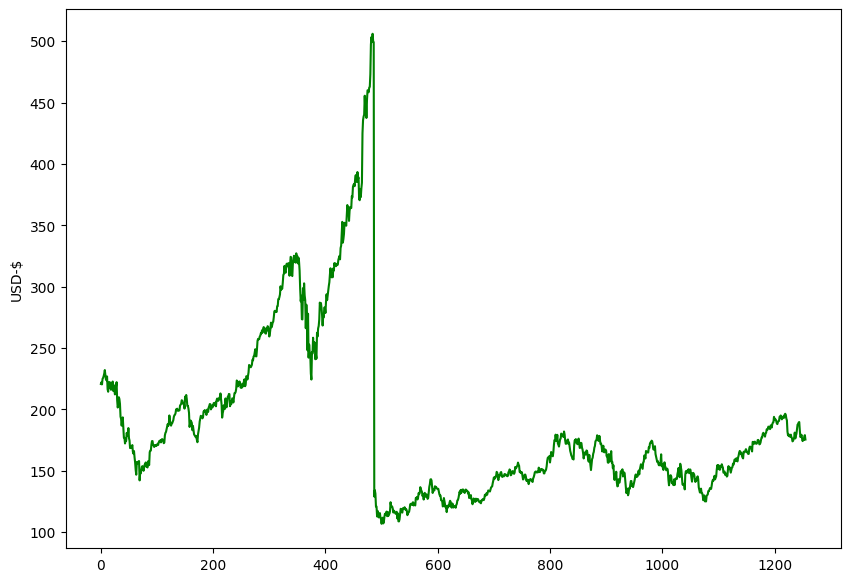

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(df1,color='green')
plt.ylabel('USD-$')


### Use MinMax Normalization as the given data as LSTM are scale sensitive

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

# Train Test Split

In [ ]:
# Time series data may have sequential dependence

train_size = int(len(df1)*0.65)
test_size = len(df1)-train_size

train_data, test_data = df1[0:train_size,:], df1[train_size:len(df1),:1]

In [ ]:
train_size,test_size

(816, 440)

### Function to create training and testing data

In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape,y_train.shape)

(715, 100) (715,)


### Reshape input to be [samples, time steps, features] which is required for LSTM

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Create Stacked LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1,activation='sigmoid',))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
12/12 [==============================] - 5s 148ms/step - loss: 0.0895 - val_loss: 0.0128
Epoch 2/100
12/12 [==============================] - 1s 85ms/step - loss: 0.0453 - val_loss: 0.0173
Epoch 3/100
12/12 [==============================] - 1s 81ms/step - loss: 0.0236 - val_loss: 0.0011
Epoch 4/100
12/12 [==============================] - 1s 79ms/step - loss: 0.0131 - val_loss: 7.2850e-04
Epoch 5/100
12/12 [==============================] - 1s 80ms/step - loss: 0.0111 - val_loss: 9.8437e-04
Epoch 6/100
12/12 [==============================] - 1s 80ms/step - loss: 0.0098 - val_loss: 5.7365e-04
Epoch 7/100
12/12 [==============================] - 1s 79ms/step - loss: 0.0090 - val_loss: 7.3000e-04
Epoch 8/100
12/12 [==============================] - 1s 80ms/step - loss: 0.0080 - val_loss: 4.0826e-04
Epoch 9/100
12/12 [==============================] - 1s 83ms/step - loss: 0.0080 - val_loss: 4.4139e-04
Epoch 10/100
12/12 [==============================] - 1s 83ms/step - loss: 

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 13ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

220.07954092766832

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

160.67575057945413

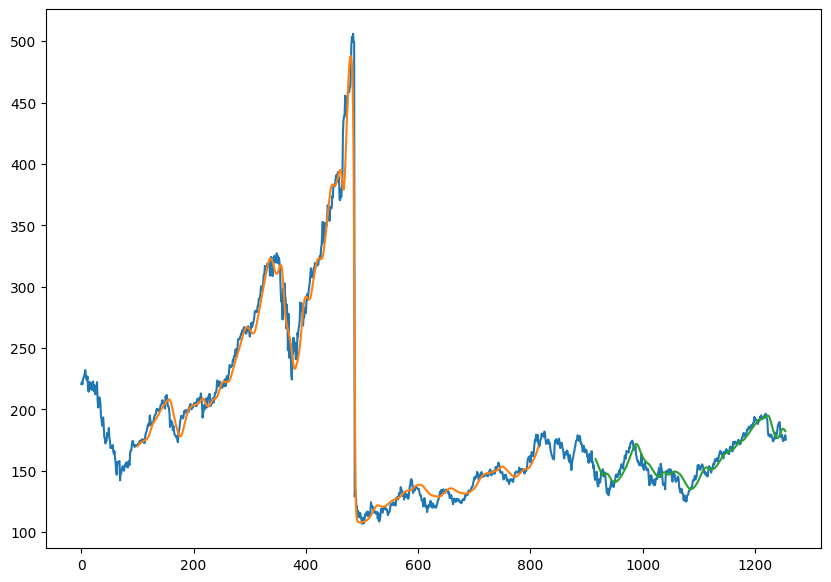

In [ ]:
step_size=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(train_predict)+step_size, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(step_size*2)+1:len(df1)-1, :] = test_predict

plt.figure(figsize=(10,7))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

440

In [ ]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

# Demonstrate prediction for next 10 days

In [ ]:
lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):

        x_input=np.array(temp_input[1:])

        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)

        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)

        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

1256

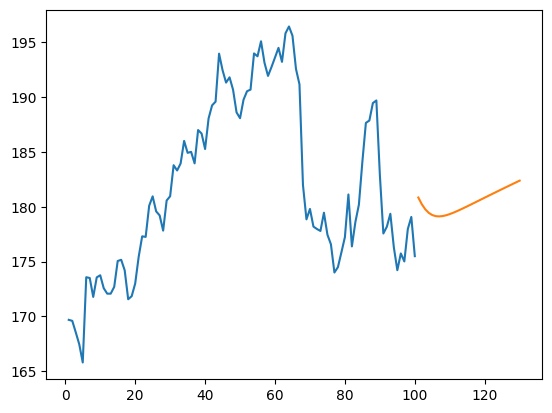

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

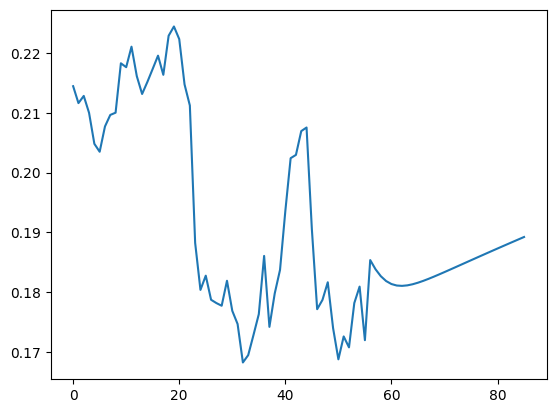

In [ ]:
df2=df1.tolist()
df2.extend(lst_output)
plt.plot(df2[1200:])